# Setup and Import Library

In [1]:
import sys
sys.version_info

sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%notebook inline

In [4]:
ROOT_PATH = '/content/drive/My Drive/Tugas/Tugas Semester 8/Tugas Akhir/13516152 - Deborah Aprilia Josephine/';

In [5]:
!pip install transformers

     |████████████████████████████████| 778kB 9.4MB/s 
     |████████████████████████████████| 890kB 39.3MB/s 
     |████████████████████████████████| 1.1MB 32.2MB/s 
     |████████████████████████████████| 3.0MB 41.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=55270fbf64351688bdd705d1f32a97915a633c70fb3966133c8a168114d0fd2f
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [6]:
!pip install seqeval

  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=c62ac9e7032b3e7bc0bc983c44159389ecc871c9d4a09bf7f1228a7a6dda82ee
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
Successfully built seqeval


In [7]:
import pandas as pd 
import numpy as np
import json
json.__version__

'2.0.9'

# Dataset

In [8]:
def read_json(filename) :
  with open(filename, 'r', encoding="utf8") as f:
    obj = json.load(f)
  return obj

def write_json(obj, filename) :
  with open(filename, 'w', encoding="utf8") as outfile:
    json.dump(obj, outfile)
  print ("Successfully write JSON obj to", filename)

def write_tsv(obj, filename) :
  file = open(filename, "w", encoding="utf-8") 
  for tokens in obj :
    for token in tokens :
      file.write(token['token'] + "\t" + token['label'] + "\n")
    file.write("==\n\n")
  file.close()
  print ("Successfully write JSON obj to", filename)

def read_tsv(filename) :
  file = open(filename, "r") 
  obj = {}
  items = []
  words = file.read().split("==\n\n")
  sentences = [[tokens.split("\t") for tokens in word.split("\n")] for word in words]
  for tokens in sentences :
    item = []
    for token in tokens :
      if len(token) == 2 :
        tok_lab = {}
        tok_lab['token'] = token[0]
        tok_lab['label'] = token[1]
        item.append(tok_lab)
    if len(item) > 1 :
      items.append(item)
  obj['tokens_labels'] = items
  return obj

# Emina, Sariayu, Wardah

In [9]:
tokped_esw = read_json(ROOT_PATH + "dataset/version 2/scenario-2-test.json")
shopee = read_tsv(ROOT_PATH + "dataset/shopee-label.txt")
for i in range(100) :
  shopee['tokens_labels'].append(tokped_esw['tokens_labels'][i])

print (len(shopee['tokens_labels']))

385


In [10]:
sentences = [[object['token'] for object in objects] for objects in shopee["tokens_labels"]]
labels = [[object['label'] for object in objects] for objects in shopee["tokens_labels"]]

# Inez, PAC dan VIVA

In [ ]:
tokped_ipv = read_json(ROOT_PATH + "dataset/version 2/scenario-2-test.json")
print (tokped_ipv['tokens_labels'][0])

[{'token': 'Inez', 'label': '1-B-Merek'}, {'token': 'Foundation', 'label': '3-B-NamaProduk'}, {'token': 'Correcting', 'label': '3-I-NamaProduk'}, {'token': 'Cream', 'label': '3-I-NamaProduk'}, {'token': 'Alas', 'label': '2-O'}, {'token': 'Padat', 'label': '2-O'}, {'token': '[SEP]', 'label': '2-O'}, {'token': 'Correcting', 'label': '3-B-NamaProduk'}, {'token': 'Cream', 'label': '3-I-NamaProduk'}, {'token': 'Inez', 'label': '1-B-Merek'}, {'token': ',', 'label': '2-O'}, {'token': 'mengandung', 'label': '2-O'}, {'token': 'Vitamin', 'label': '2-O'}, {'token': 'A', 'label': '2-O'}, {'token': 'palmitat', 'label': '2-O'}, {'token': 'dan', 'label': '2-O'}, {'token': 'Vitamin', 'label': '2-O'}, {'token': 'E', 'label': '2-O'}, {'token': 'Acetat', 'label': '2-O'}, {'token': 'yg', 'label': '2-O'}, {'token': 'berfungsi', 'label': '2-O'}, {'token': 'u', 'label': '2-O'}, {'token': 'menjaga', 'label': '2-O'}, {'token': 'kelembaban', 'label': '2-O'}, {'token': 'kulit', 'label': '2-O'}, {'token': 'serta'

In [ ]:
sentences = [[object['token'] for object in objects] for objects in tokped_ipv["tokens_labels"]]
print (sentences[0])

['Inez', 'Foundation', 'Correcting', 'Cream', 'Alas', 'Padat', '[SEP]', 'Correcting', 'Cream', 'Inez', ',', 'mengandung', 'Vitamin', 'A', 'palmitat', 'dan', 'Vitamin', 'E', 'Acetat', 'yg', 'berfungsi', 'u', 'menjaga', 'kelembaban', 'kulit', 'serta', 'sebagai', 'antioksidan', '.', 'selain', 'untuk', 'menyamarkan', 'noda', 'pada', 'wajah', ',', 'Correting', 'Cream', 'ini', 'bisa', 'digunakan', 'u', 'mengoreksi', 'bentuk', 'wajah', '.', 'Memiliki', '4', 'koleksi', 'warna', '.', '.', '.', '.', '.', '.', '01', '.', 'light', '.', '02', '.', 'medium', '.', '03', '.', 'Vivid', '.', '04', '.', 'Dark', 'Guys', 'jng', 'lupa', 'cantumin', 'salah', 'satu', 'koleksi', 'warnanya', 'ya', 'Selamat', 'berbelanja', 'dan', 'Terima', 'kasih', '.']


In [ ]:
labels = [[object['label'] for object in objects] for objects in tokped_ipv["tokens_labels"]]
print (labels[0])

['1-B-Merek', '3-B-NamaProduk', '3-I-NamaProduk', '3-I-NamaProduk', '2-O', '2-O', '2-O', '3-B-NamaProduk', '3-I-NamaProduk', '1-B-Merek', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '6-B-Penggunaan', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '6-B-Penggunaan', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '4-B-Varian', '4-I-Varian', '4-I-Varian', '2-O', '4-B-Varian', '4-I-Varian', '4-I-Varian', '2-O', '4-B-Varian', '4-I-Varian', '4-I-Varian', '2-O', '4-B-Varian', '4-I-Varian', '4-I-Varian', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O', '2-O']


In [11]:
tag2idx = {
    "1-B-Merek" : 1,
    "1-I-Merek" : 2,
    "2-O" : 3,
    "3-B-NamaProduk" : 4,
    "3-I-NamaProduk" : 5,
    "4-B-Varian" : 6,
    "4-I-Varian" : 7,
    "5-B-Ukuran" : 8,
    "5-I-Ukuran" : 9,
    "6-B-Penggunaan" : 10,
    "6-I-Penggunaan" : 11,
    "7-B-Tekstur" : 12,
    "7-I-Tekstur" : 13,
    "PAD" : 14
}

tag2idx2= {
    "B-Merek" : 1,
    "I-Merek" : 2,
    "O" : 3,
    "B-NamaProduk" : 4,
    "I-NamaProduk" : 5,
    "B-Varian" : 6,
    "I-Varian" : 7,
    "B-Ukuran" : 8,
    "I-Ukuran" : 9,
    "B-Penggunaan" : 10,
    "I-Penggunaan" : 11,
    "B-Tekstur" : 12,
    "I-Tekstur" : 13,
    "PAD" : 14
}

tag_values = [tag for tag in tag2idx2.keys()]
print (tag_values)

['B-Merek', 'I-Merek', 'O', 'B-NamaProduk', 'I-NamaProduk', 'B-Varian', 'I-Varian', 'B-Ukuran', 'I-Ukuran', 'B-Penggunaan', 'I-Penggunaan', 'B-Tekstur', 'I-Tekstur', 'PAD']


# Labelling Model

## Training Setup

In [12]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertConfig, XLMRobertaTokenizer, XLMRobertaConfig, DistilBertTokenizer, DistilBertConfig
from transformers import BertForTokenClassification, XLMRobertaForTokenClassification, DistilBertForTokenClassification

from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [13]:
MAX_LEN = max([len(sentence) for sentence in sentences])
BATCH_SIZE = 8

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla T4'

In [15]:
MODEL_NAME = 'xlm-roberta-base'
tokenizer = XLMRobertaTokenizer.from_pretrained(MODEL_NAME, do_lower_case=False)
model = XLMRobertaForTokenClassification.from_pretrained(
    MODEL_NAME,
    num_labels=len(tag2idx),
    output_attentions = False,
    output_hidden_states = False
)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-st

In [16]:
def tokenize_and_preserve_labels(sentence, text_labels):
  tokenized_sentence = []
  labels = []

  for word, label in zip(sentence, text_labels):

    # Tokenize the word and count # of subwords the word is broken into
    tokenized_word = tokenizer.tokenize(word)
    n_subwords = len(tokenized_word)


    # Add the tokenized word to the final tokenized word list
    tokenized_sentence.extend(tokenized_word)

    # Add the same label to the new list of labels `n_subwords` times
    labels.extend([label] * n_subwords)

  return tokenized_sentence, labels

In [17]:
tokenized_texts_and_labels = [
    tokenize_and_preserve_labels(sent, labs)
    for sent, labs in zip(sentences, labels)
]

In [18]:
tokenized_texts = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels]
labels = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels]

In [19]:
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", value=0.0,
                          truncating="post", padding="post")

In [20]:
# all = []
# for lab in labels :
#   for l in lab :
#     all.append(l)
# set(all)

In [21]:
tags = pad_sequences([[tag2idx.get(l) for l in lab] for lab in labels],
                     maxlen=MAX_LEN, value=tag2idx["PAD"], padding="post",
                     dtype="long", truncating="post")

In [22]:
attention_masks = [[float(i != 0.0) for i in ii] for ii in input_ids]

In [23]:
tr_inputs, val_inputs, tr_tags, val_tags = train_test_split(input_ids, tags,
                                                            random_state=2020, test_size=0.3)
tr_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2020, test_size=0.3)

In [24]:
tr_inputs = torch.tensor(tr_inputs)
tr_tags = torch.tensor(tr_tags)
tr_masks = torch.tensor(tr_masks)

val_inputs = torch.tensor(val_inputs)
val_tags = torch.tensor(val_tags)
val_masks = torch.tensor(val_masks)

In [25]:
train_data = TensorDataset(tr_inputs, tr_masks, tr_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=BATCH_SIZE)

valid_data = TensorDataset(val_inputs, val_masks, val_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=BATCH_SIZE)

## Training

In [26]:
from transformers import AdamW

In [27]:
model.cuda();

In [28]:
FULL_FINETUNING = True
if FULL_FINETUNING:
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]
else:
    param_optimizer = list(model.classifier.named_parameters())
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

optimizer = AdamW(
    optimizer_grouped_parameters,
    lr=3e-5,
    eps=1e-8
)

In [29]:
from transformers import get_linear_schedule_with_warmup

epochs = 25
max_grad_norm = 1.0

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

In [30]:
from seqeval.metrics import f1_score, accuracy_score
from seqeval.metrics import classification_report

In [31]:
loss_values, validation_loss_values, validation_accuracies, validation_f1scores = [], [], [], []

for _ in range(epochs):
  model.train()
  total_loss = 0

  # Training
  for step, batch in enumerate(train_dataloader):
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    model.zero_grad()
    
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    loss = outputs[0]
    loss.backward()
    total_loss += loss.item()
    torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)
    optimizer.step()
    scheduler.step()

  avg_train_loss = total_loss / len(train_dataloader)
  print("Average train loss: {}".format(avg_train_loss))

  loss_values.append(avg_train_loss)

  # Validation
  model.eval()
  
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0
  predictions , true_labels = [], []
  
  for batch in valid_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None,
                        attention_mask=b_input_mask, labels=b_labels)
    logits = outputs[1].detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    eval_loss += outputs[0].mean().item()
    predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
    true_labels.extend(label_ids)

  eval_loss = eval_loss / len(valid_dataloader)
  validation_loss_values.append(eval_loss)
  print("Validation loss: {}".format(eval_loss))

  pred_tags = [tag_values[p_i] for p, l in zip(predictions, true_labels)
                              for p_i, l_i in zip(p, l) if tag_values[l_i - 1] != "PAD"]
  valid_tags = [tag_values[l_i] for l in true_labels
                                for l_i in l if tag_values[l_i - 1] != "PAD"]

  print("Validation Accuracy: {}".format(accuracy_score(valid_tags, pred_tags)))
  validation_accuracies.append(accuracy_score(valid_tags, pred_tags))

  print("Validation F1-Score: {}".format(f1_score(valid_tags, pred_tags)))
  validation_f1scores.append(f1_score(valid_tags, pred_tags))

  print (classification_report(valid_tags, pred_tags))
  print()

Average train loss: 0.9642388820648193
Validation loss: 0.4265394349892934
Validation Accuracy: 0.8688915375446961
Validation F1-Score: 0.8703418540190945
            precision    recall  f1-score   support

NamaProduk       0.94      0.96      0.95      8974
    Ukuran       0.55      0.76      0.64       612
    Varian       0.53      0.78      0.63      1054
Penggunaan       0.00      0.00      0.00       229
     Merek       0.21      0.13      0.16       191
       PAD       0.00      0.00      0.00         6
   Tekstur       0.00      0.00      0.00        46

 micro avg       0.85      0.89      0.87     11112
 macro avg       0.84      0.89      0.86     11112


Average train loss: 0.29519516799379797
Validation loss: 0.18794101576010386
Validation Accuracy: 0.9539417674101822
Validation F1-Score: 0.9549807571824935
            precision    recall  f1-score   support

NamaProduk       0.98      0.98      0.98      8974
    Ukuran       0.78      0.92      0.84       612
    Var

In [32]:
metrics = {}
metrics['loss-values'] = loss_values
metrics['validation-loss'] = validation_loss_values
metrics['validation-accuracy'] = validation_accuracies
metrics['validation-f1'] = validation_f1scores

for key, values in metrics.items() :
  print (key, len(values))

loss-values 25
validation-loss 25
validation-accuracy 25
validation-f1 25


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


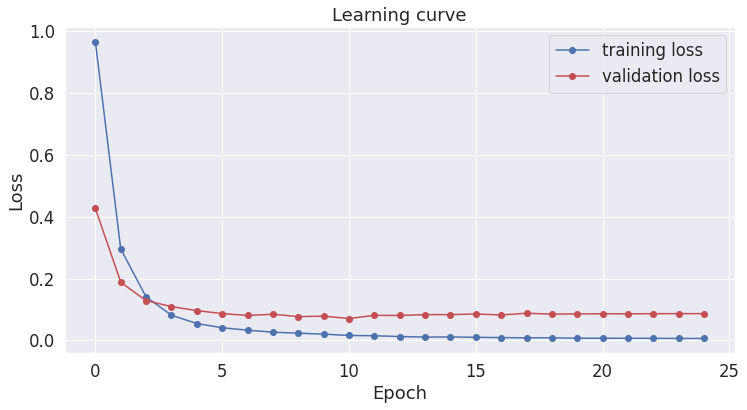

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o', label="training loss")
plt.plot(validation_loss_values, 'r-o', label="validation loss")

# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [34]:
import datetime
torch.save(model, ROOT_PATH + "model/model-labelling-tokped-esw.pth")

# Label